In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn - Machine Learning Package
import sklearn.model_selection as modsel
from sklearn import metrics
from sklearn.metrics import classification_report

#Gaussian Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB


## Load and Inspect Data

In [2]:
filename = 'diabetes.csv'
DT = pd.read_csv(filename,sep=',')

####
# Data Inspection
# - Total Number of Records and Features
# - Unique Feature Data Types
# - Presence of Null Entries
####

print('Dimensions: %s records x %s features.' % DT.shape)

print('Unique Feature Data Types: %s' % len(DT.dtypes.unique()))
for x in DT.dtypes.unique():
    print(' -> '+str(x))

null_idx = DT.isnull().any().values
null_idx = null_idx[null_idx==True]
print('')
print('NULL Entries: %s \n' % len(null_idx))
if(len(null_idx)>0):
    for x in null_idx:
        if(DT.iloc[:,x].isnull()):
            print(' - ' + str(x) + ' has %s NULL entries' % len(DT[x].isnull()))
del null_idx

print(DT.info())

Dimensions: 768 records x 9 features.
Unique Feature Data Types: 2
 -> int64
 -> float64

NULL Entries: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


### Split Data into Training and Test Sets

In [3]:
#Proportion of Data Used for Test Set
prop_test = 0.2

cols = DT.columns[0:-1]
str_output = 'Outcome'

#Create Train & Test Sets
X_train, X_test, y_train, y_test = modsel.train_test_split(
                DT[cols],
                DT[str_output],
                test_size=prop_test, 
                random_state=1234)

### Initialize & Train Model Object

In [4]:
priors = [0.5,0.5]
model_NB_class = GaussianNB(priors = priors)
model_NB_class.fit(X_train, y_train)

GaussianNB(priors=[0.5, 0.5])

### Model Validation - Training Set

In [6]:
train_preds = model_NB_class.predict(X_train)
print(classification_report(y_train,train_preds))

             precision    recall  f1-score   support

          0       0.82      0.78      0.80       401
          1       0.62      0.68      0.65       213

avg / total       0.75      0.75      0.75       614



### Model Validation - Test Set

In [7]:
test_preds = model_NB_class.predict(X_test)
print(classification_report(y_test,test_preds))

             precision    recall  f1-score   support

          0       0.82      0.83      0.82        99
          1       0.69      0.67      0.68        55

avg / total       0.77      0.77      0.77       154



### Model Validation - ROC Curve

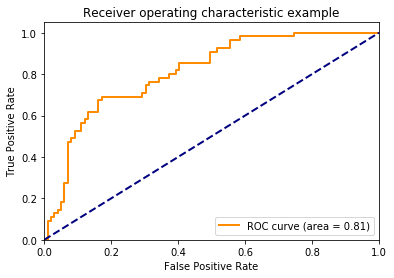

In [8]:
#Calculate Probabilities for Class 1
test_probs = model_NB_class.predict_proba(X_test)

#Calculate FPR and TPR for Difference Thresholds
fpr, tpr,thresholds = metrics.roc_curve(y_true=y_test,y_score = test_probs[:,1])

#Calculate AUC for ROC
auc = metrics.roc_auc_score(y_true=y_test,y_score = test_probs[:,1])

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()